# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('dubai_properties.csv')

# Data Description

In [3]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [4]:
df.dtypes

Address                    object
Rent                        int64
Beds                        int64
Baths                       int64
Type                       object
Area_in_sqft                int64
Rent_per_sqft             float64
Rent_category              object
Frequency                  object
Furnishing                 object
Purpose                    object
Posted_date                object
Age_of_listing_in_days      int64
Location                   object
City                       object
Latitude                  float64
Longitude                 float64
dtype: object

In [5]:
df.shape

(73742, 17)

In [6]:
df.describe

<bound method NDFrame.describe of                                                  Address    Rent  Beds  Baths  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                    Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3      Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                        West Yas, Yas Island, Abu Dhabi  350000     5      7   
...                                                  ...     ...   ...    ...   
73737             Al Huboob 1, Al Salamah, Umm Al Quwain   14000     0      1   
73738                Umm Al Quwain Marina, Umm Al Quwain   14000     0      1   
73739                  King Faisal Street, Umm Al Quwain   50000     3      4   
73740                           Al Maqtaa, Umm Al Quwain   37000     1      2   
73741                             Al Rass, Umm Al Quwain   11000     0     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

# Data Cleaning

In [8]:
print(df.isnull().sum())

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64


In [9]:
# Remove rows with null values in the 'Latitude' and 'Longitude' columns
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Verify the shape of the DataFrame after removing null values
print("Data shape after removing null values in Latitude and Longitude columns:", df.shape)


Data shape after removing null values in Latitude and Longitude columns: (73023, 17)


In [10]:
difference = 73742-73023
print(f'The difference between rows after removing missing values = {difference}')

The difference between rows after removing missing values = 719


In [11]:
# checking for duplicates in the dataset
df_dup = df[df.duplicated()]
df_dup

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude


# Identifying Outliers

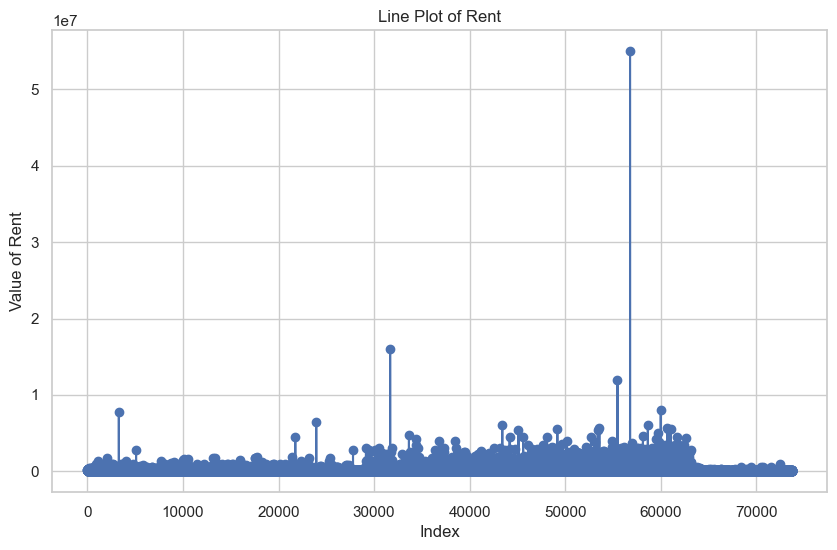

Identified outliers:                                         Address     Rent  Beds  Baths  \
4               West Yas, Yas Island, Abu Dhabi   350000     5      7   
125                       Al Mushrif, Abu Dhabi   370000     7      9   
216                Mayan, Yas Island, Abu Dhabi   375000     4      5   
254                     Khalifa City, Abu Dhabi   350000     9     10   
436    Aspens, Yas Acres, Yas Island, Abu Dhabi   350000     4      5   
...                                         ...      ...   ...    ...   
69424                         Muwaileh, Sharjah   565000    11     11   
70461                           Dasman, Sharjah   600000     7      8   
70727                           Dasman, Sharjah   500000     8     11   
71581                           Dasman, Sharjah   500000    10     11   
72447           Maryam Island, Al Khan, Sharjah  1010000     2      2   

                       Type  Area_in_sqft  Rent_per_sqft Rent_category  \
4                     Villa 

In [12]:
# Plotting a simple line plot for column A
plt.figure(figsize=(10, 6))
plt.plot(df['Rent'], marker='o', linestyle='-')
plt.title('Line Plot of Rent')
plt.xlabel('Index')
plt.ylabel('Value of Rent')
plt.grid(True)
plt.show()

# Identifying outliers
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Rent'] < (Q1 - 1.5 * IQR)) | (df['Rent'] > (Q3 + 1.5 * IQR))]
print("Identified outliers:", outliers)

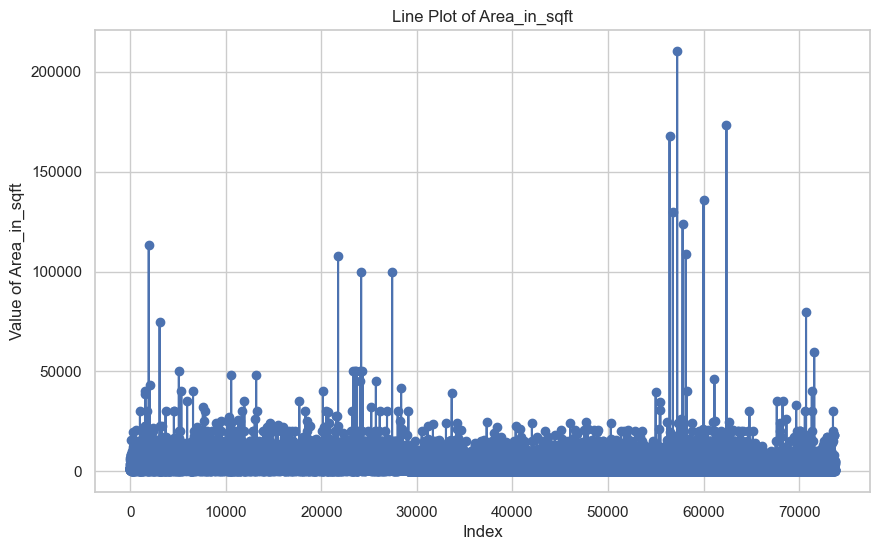

Identified outliers:                                                  Address    Rent  Beds  Baths  \
4                        West Yas, Yas Island, Abu Dhabi  350000     5      7   
12                       West Yas, Yas Island, Abu Dhabi  330000     5      7   
36     Al Tharwaniyah Community, Al Raha Gardens, Abu...  235000     5      8   
42                      MSH16, Shakhbout City, Abu Dhabi  135000     5      5   
63                                  Al Muroor, Abu Dhabi  155000     5      5   
...                                                  ...     ...   ...    ...   
73705                          Al Salamah, Umm Al Quwain  100000     5      7   
73711                          Al Salamah, Umm Al Quwain   50000     3      3   
73713                          Al Salamah, Umm Al Quwain   50000     4      4   
73716                          Al Salamah, Umm Al Quwain   75000     4      4   
73721                           Al Humrah, Umm Al Quwain   40000     4      4   

      

In [13]:
# Plotting a simple line plot for column A
plt.figure(figsize=(10, 6))
plt.plot(df['Area_in_sqft'], marker='o', linestyle='-')
plt.title('Line Plot of Area_in_sqft')
plt.xlabel('Index')
plt.ylabel('Value of Area_in_sqft')
plt.grid(True)
plt.show()

# Identifying outliers
Q1 = df['Area_in_sqft'].quantile(0.25)
Q3 = df['Area_in_sqft'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Area_in_sqft'] < (Q1 - 1.5 * IQR)) | (df['Area_in_sqft'] > (Q3 + 1.5 * IQR))]
print("Identified outliers:", outliers)

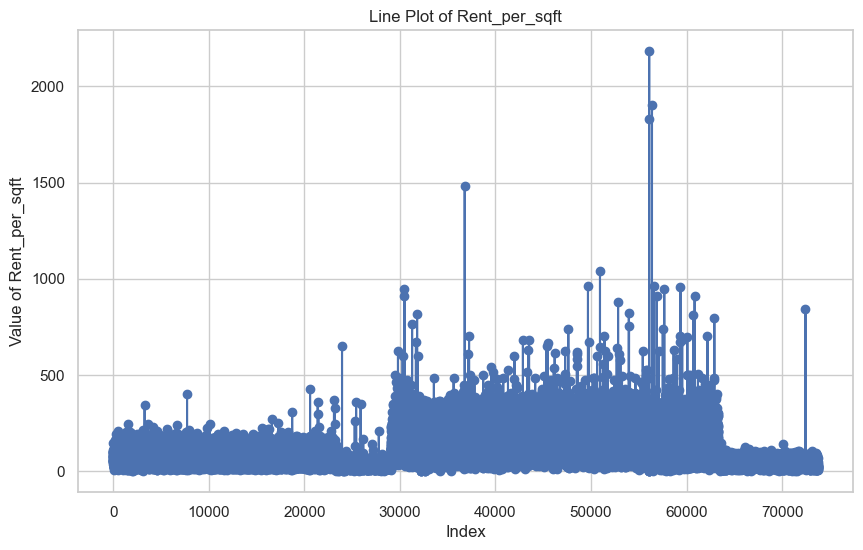

Identified outliers:                                                  Address     Rent  Beds  \
1560   Mamsha Al Saadiyat, Saadiyat Cultural District...   350000     1   
3281                               Al Shamkha, Abu Dhabi  7700000     7   
3591                             Al Shawamekh, Abu Dhabi    37000     0   
6705                                Al Muroor, Abu Dhabi    60000     1   
7723                                Al Bateen, Abu Dhabi  1000000     7   
...                                                  ...      ...   ...   
63283               Dukes The Palm, Palm Jumeirah, Dubai   150000     0   
63293  Address Harbour Point, Dubai Creek Harbour, Dubai   220000     1   
63302  Sunrise Bay, Emaar Beachfront, Dubai Harbour, ...   335000     2   
63309  NH Collection Dubai The Palm, Palm Jumeirah, D...   210000     1   
72447                    Maryam Island, Al Khan, Sharjah  1010000     2   

       Baths       Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  

In [14]:
# Plotting a simple line plot for column A
plt.figure(figsize=(10, 6))
plt.plot(df['Rent_per_sqft'], marker='o', linestyle='-')
plt.title('Line Plot of Rent_per_sqft')
plt.xlabel('Index')
plt.ylabel('Value of Rent_per_sqft')
plt.grid(True)
plt.show()

# Identifying outliers
Q1 = df['Rent_per_sqft'].quantile(0.25)
Q3 = df['Rent_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Rent_per_sqft'] < (Q1 - 1.5 * IQR)) | (df['Rent_per_sqft'] > (Q3 + 1.5 * IQR))]
print("Identified outliers:", outliers)

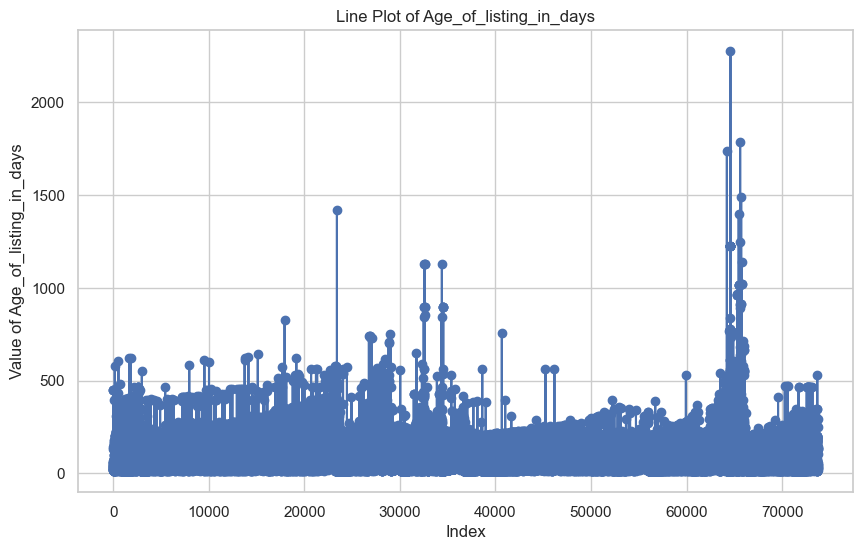

Identified outliers:                                               Address    Rent  Beds  Baths  \
10                 Bloom Marina, Al Bateen, Abu Dhabi  110000     2      2   
20            Al Heel Tower, Al Khalidiyah, Abu Dhabi   95000     3      3   
25            Al Waha Tower, Al Khalidiyah, Abu Dhabi   85000     3      3   
26            Al Heel Tower, Al Khalidiyah, Abu Dhabi   75000     2      2   
32                 Bloom Marina, Al Bateen, Abu Dhabi  105000     2      3   
...                                               ...     ...   ...    ...   
73693  Umm Al Quwain Marina, Al Ramlah, Umm Al Quwain   24000     2      3   
73695  Umm Al Quwain Marina, Al Ramlah, Umm Al Quwain   16000     1      2   
73698                       Al Abraq 1, Umm Al Quwain   60000     2      3   
73718                       Al Hawiyah, Umm Al Quwain   15000     1      1   
73728           Al Humrah B, Al Humrah, Umm Al Quwain   18000     2      2   

            Type  Area_in_sqft  Rent_per_s

In [15]:
# Plotting a simple line plot for column A
plt.figure(figsize=(10, 6))
plt.plot(df['Age_of_listing_in_days'], marker='o', linestyle='-')
plt.title('Line Plot of Age_of_listing_in_days')
plt.xlabel('Index')
plt.ylabel('Value of Age_of_listing_in_days')
plt.grid(True)
plt.show()

# Identifying outliers
Q1 = df['Age_of_listing_in_days'].quantile(0.25)
Q3 = df['Age_of_listing_in_days'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age_of_listing_in_days'] < (Q1 - 1.5 * IQR)) | (df['Age_of_listing_in_days'] > (Q3 + 1.5 * IQR))]
print("Identified outliers:", outliers)

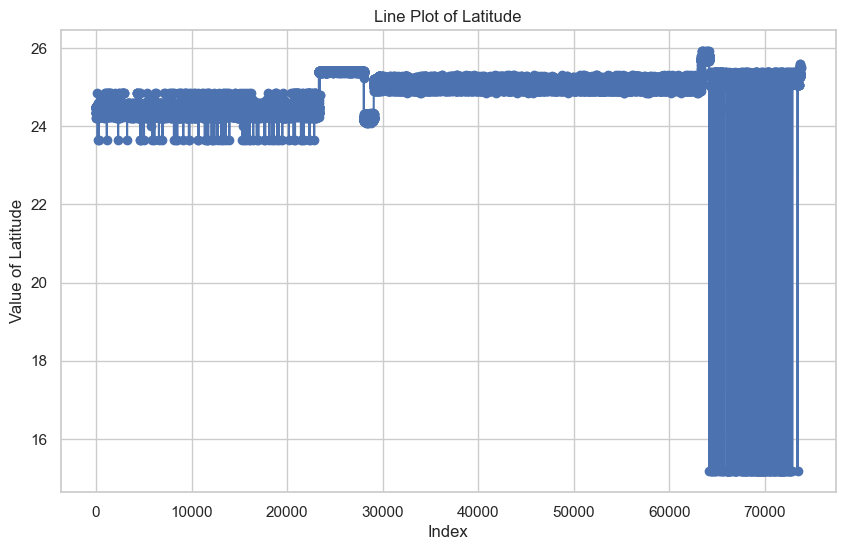

Identified outliers:                                 Address    Rent  Beds  Baths       Type  \
64194  Nasma Residence, Al Tai, Sharjah   74555     2      4  Townhouse   
64324  Nasma Residence, Al Tai, Sharjah   75000     2      3      Villa   
64394  Nasma Residence, Al Tai, Sharjah  110000     3      4  Townhouse   
64458  Nasma Residence, Al Tai, Sharjah   95000     3      5  Townhouse   
64618                   Al Tai, Sharjah  150000     4      5      Villa   
...                                 ...     ...   ...    ...        ...   
72652  Nasma Residence, Al Tai, Sharjah  130000     4      4      Villa   
72653  Nasma Residence, Al Tai, Sharjah  139999     4      4      Villa   
72720  Nasma Residence, Al Tai, Sharjah   95000     3      4      Villa   
72869  Nasma Residence, Al Tai, Sharjah   75000     2      3      Villa   
73428  Nasma Residence, Al Tai, Sharjah  139998     4      6      Villa   

       Area_in_sqft  Rent_per_sqft Rent_category Frequency   Furnishing  \
641

In [16]:
# Plotting a simple line plot for column A
plt.figure(figsize=(10, 6))
plt.plot(df['Latitude'], marker='o', linestyle='-')
plt.title('Line Plot of Latitude')
plt.xlabel('Index')
plt.ylabel('Value of Latitude')
plt.grid(True)
plt.show()

# Identifying outliers
Q1 = df['Latitude'].quantile(0.25)
Q3 = df['Latitude'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Latitude'] < (Q1 - 1.5 * IQR)) | (df['Latitude'] > (Q3 + 1.5 * IQR))]
print("Identified outliers:", outliers)

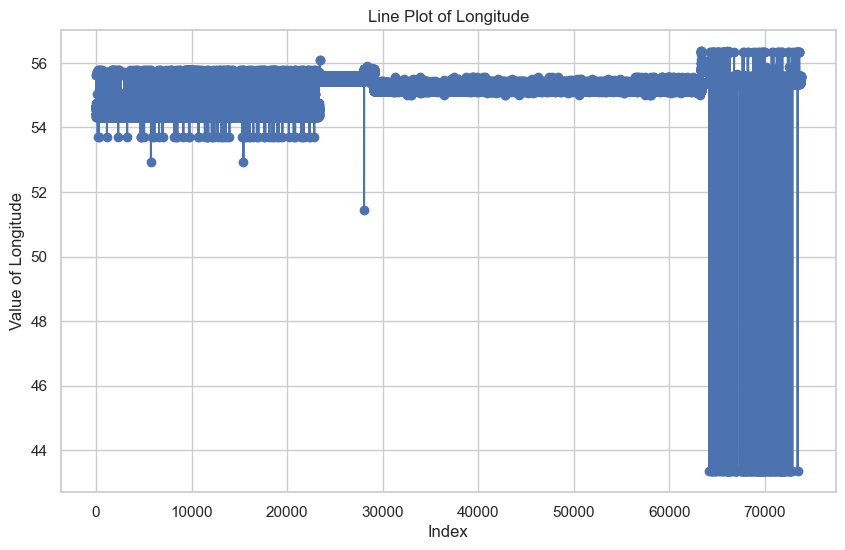

Identified outliers:                                                  Address    Rent  Beds  Baths  \
5745   Al Nakheel Hotel Apartments, Al Dhafrah, Abu D...   55000     2      2   
15422  Al Nakheel Hotel Apartments, Al Dhafrah, Abu D...   85000     2      2   
28047                                   Al Hayer, Al Ain   35000     2      2   
64194                   Nasma Residence, Al Tai, Sharjah   74555     2      4   
64324                   Nasma Residence, Al Tai, Sharjah   75000     2      3   
...                                                  ...     ...   ...    ...   
72652                   Nasma Residence, Al Tai, Sharjah  130000     4      4   
72653                   Nasma Residence, Al Tai, Sharjah  139999     4      4   
72720                   Nasma Residence, Al Tai, Sharjah   95000     3      4   
72869                   Nasma Residence, Al Tai, Sharjah   75000     2      3   
73428                   Nasma Residence, Al Tai, Sharjah  139998     4      6   

      

In [17]:
# Plotting a simple line plot for column A
plt.figure(figsize=(10, 6))
plt.plot(df['Longitude'], marker='o', linestyle='-')
plt.title('Line Plot of Longitude')
plt.xlabel('Index')
plt.ylabel('Value of Longitude')
plt.grid(True)
plt.show()

# Identifying outliers
Q1 = df['Longitude'].quantile(0.25)
Q3 = df['Longitude'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Longitude'] < (Q1 - 1.5 * IQR)) | (df['Longitude'] > (Q3 + 1.5 * IQR))]
print("Identified outliers:", outliers)

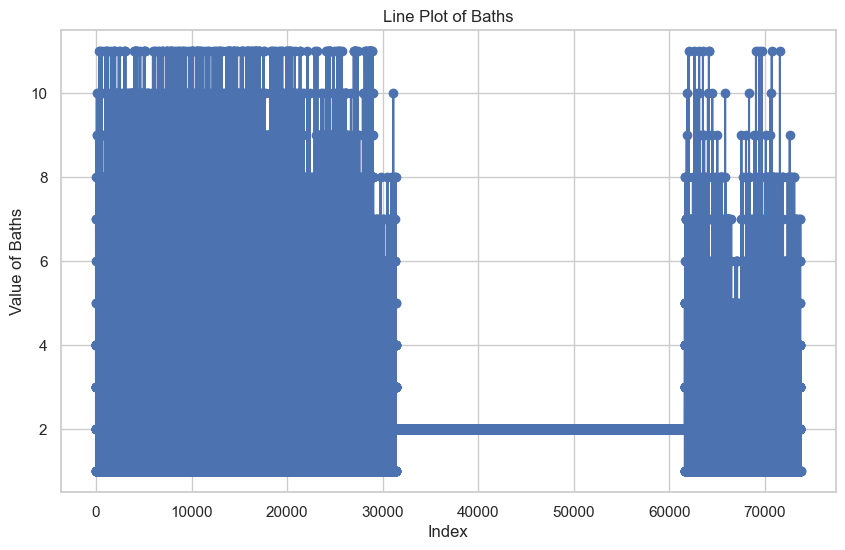

Identified outliers:                                                  Address    Rent  Beds  Baths  \
4                        West Yas, Yas Island, Abu Dhabi  350000     5      7   
12                       West Yas, Yas Island, Abu Dhabi  330000     5      7   
13     Contemporary Style, Al Reef Villas, Al Reef, A...  149000     5      6   
17     Contemporary Style, Al Reef Villas, Al Reef, A...  129995     4      5   
36     Al Tharwaniyah Community, Al Raha Gardens, Abu...  235000     5      8   
...                                                  ...     ...   ...    ...   
73699                          Al Qarayen, Umm Al Quwain  150000     8      6   
73702                          Al Qarayen, Umm Al Quwain  150000     6      6   
73703                          Al Qarayen, Umm Al Quwain  150000     6      6   
73704                       Old Town Area, Umm Al Quwain   35000     4      5   
73705                          Al Salamah, Umm Al Quwain  100000     5      7   

      

In [18]:
# Plotting a simple line plot for column A
plt.figure(figsize=(10, 6))
plt.plot(df['Baths'], marker='o', linestyle='-')
plt.title('Line Plot of Baths')
plt.xlabel('Index')
plt.ylabel('Value of Baths')
plt.grid(True)
plt.show()

# Identifying outliers
Q1 = df['Baths'].quantile(0.25)
Q3 = df['Baths'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Baths'] < (Q1 - 1.5 * IQR)) | (df['Baths'] > (Q3 + 1.5 * IQR))]
print("Identified outliers:", outliers)

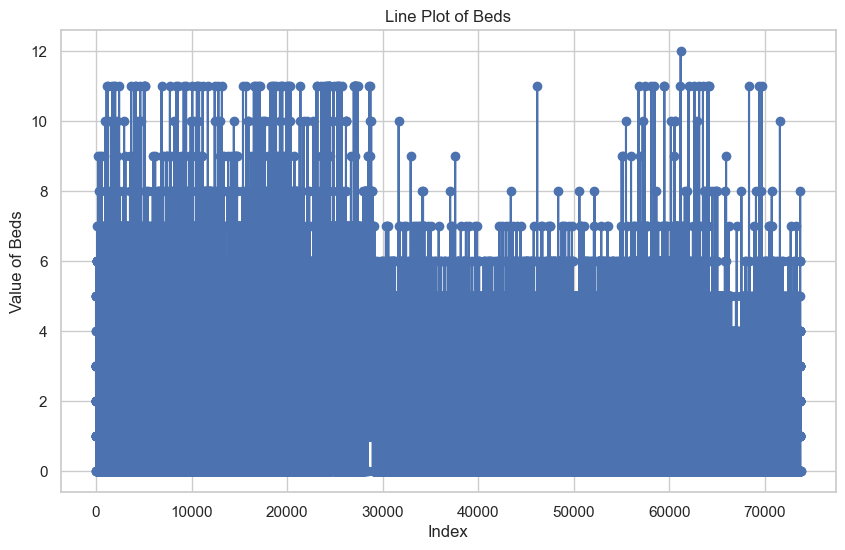

Identified outliers:                             Address    Rent  Beds  Baths   Type  Area_in_sqft  \
125           Al Mushrif, Abu Dhabi  370000     7      9  Villa          6310   
194               Rabdan, Abu Dhabi  190000     7      8  Villa          7000   
254         Khalifa City, Abu Dhabi  350000     9     10  Villa         19766   
327    Madinat Al Riyadh, Abu Dhabi  160000     8     11  Villa         12000   
352             Al Bahia, Abu Dhabi  140000     7      6  Villa          3000   
...                             ...     ...   ...    ...    ...           ...   
70750                Hoshi, Sharjah  180000     7      8  Villa         10000   
71581               Dasman, Sharjah  500000    10     11  Villa         60000   
72709             Muwaileh, Sharjah  160000     7      8  Villa         12000   
73315         Al Nekhailat, Sharjah  120000     7      7  Villa          6500   
73699     Al Qarayen, Umm Al Quwain  150000     8      6  Villa         18000   

      

In [19]:
# Plotting a simple line plot for column A
plt.figure(figsize=(10, 6))
plt.plot(df['Beds'], marker='o', linestyle='-')
plt.title('Line Plot of Beds')
plt.xlabel('Index')
plt.ylabel('Value of Beds')
plt.grid(True)
plt.show()

# Identifying outliers
Q1 = df['Beds'].quantile(0.25)
Q3 = df['Beds'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Beds'] < (Q1 - 1.5 * IQR)) | (df['Beds'] > (Q3 + 1.5 * IQR))]
print("Identified outliers:", outliers)

In [20]:
# Calculating correlation between independent variables and target variable
correlation = df[['Rent', 'Beds', 'Baths','Area_in_sqft','Rent_per_sqft','Age_of_listing_in_days', 'Latitude','Longitude']].corrwith(df['Rent'])

print("Correlation with 'Rents':")
print(correlation)

Correlation with 'Rents':
Rent                      1.000000
Beds                      0.311179
Baths                     0.080013
Area_in_sqft              0.410185
Rent_per_sqft             0.348614
Age_of_listing_in_days    0.002431
Latitude                  0.027837
Longitude                 0.007521
dtype: float64


# Removing Outliers

# Splitting the data into Train and Test

In [21]:
x = df[['Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft']]
y = df['Rent']

# Splitting the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (58418, 4)
Shape of X_test: (14605, 4)
Shape of y_train: (58418,)
Shape of y_test: (14605,)


In [22]:
x_train.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft
1611,5,5,2000,60.000000
25466,2,3,1650,30.303030
70095,1,1,820,29.268293
72495,2,2,1131,66.312997
58926,1,2,833,144.057623


In [23]:
y_train.head()

1611     120000
25466     50000
70095     24000
72495     75000
58926    120000
Name: Rent, dtype: int64

In [24]:
x_test.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft
45037,2,2,1226,187.601958
51126,0,2,380,118.421053
31524,1,2,532,169.172932
8215,2,3,1350,100.000000
29637,2,2,926,145.788337


In [25]:
y_test.head()

45037    230000
51126     45000
31524     90000
8215     135000
29637    135000
Name: Rent, dtype: int64

In [26]:
# Calculating correlation between independent variables and target variable
correlation = df[['Rent', 'Beds', 'Baths','Area_in_sqft','Rent_per_sqft','Age_of_listing_in_days', 'Latitude','Longitude']].corrwith(df['Rent'])

print("Correlation with 'Rents':")
print(correlation)

Correlation with 'Rents':
Rent                      1.000000
Beds                      0.311179
Baths                     0.080013
Area_in_sqft              0.410185
Rent_per_sqft             0.348614
Age_of_listing_in_days    0.002431
Latitude                  0.027837
Longitude                 0.007521
dtype: float64


# Training the model with dataset

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training features and target respectively
# Assuming X_test and y_test are your test features and target respectively

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Predict target values on the test data
y_pred = model.predict(x_test)

# Calculate mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 43080926631.03749


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Assuming you have your train and test datasets as X_train, y_train, X_test, y_test

# Initialize GBM regressor
gbm = GradientBoostingRegressor()

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best model
best_gbm = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_gbm.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=

KeyboardInterrupt: 